# Calculate the daily log returns of T-Bill, gold, GE stock and market

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
data = pd.read_csv("C:\\Users\\rluck\\OneDrive\\capm.csv", header=[4])
data

,DATE,Gold,S&P500,Rf,GE
0,12/08/1975,166.05,87.12,6.40,0.9218
1,13/08/1975,163.50,85.97,6.45,0.9036
2,14/08/1975,163.50,85.60,6.45,0.9036
3,15/08/1975,163.50,86.36,6.42,0.9244
4,18/08/1975,163.50,86.20,6.42,0.9348
...,...,...,...,...,...
10432,6/08/2015,1090.15,2083.56,0.04,26.0300
10433,7/08/2015,1096.85,2077.57,0.06,25.7900
10434,10/08/2015,1103.35,2104.18,0.12,26.2400
10435,11/08/2015,1109.67,2084.07,0.10,25.7100


#Computing log returns: R_gold = 100*ln(P_g/P_g-1)


Rf = 100/360*ln(1+rf)

In [94]:
data['R_gold']=100*np.log(data['Gold']/data['Gold'].shift(1))
data['R_f']= 100/360*np.log(1+data['Rf']/100)
data['R_GE']= 100*np.log(data['GE']/data['GE'].shift(1))
data['R_m']= 100*np.log(data['S&P500']/data['S&P500'].shift(1))
print(data.head())

         DATE    Gold  S&P500    Rf      GE    R_gold       R_f      R_GE  \
0  12/08/1975  166.05   87.12  6.40  0.9218       NaN  0.017232       NaN   
1  13/08/1975  163.50   85.97  6.45  0.9036 -1.547596  0.017363 -1.994150   
2  14/08/1975  163.50   85.60  6.45  0.9036  0.000000  0.017363  0.000000   
3  15/08/1975  163.50   86.36  6.42  0.9244  0.000000  0.017284  2.275809   
4  18/08/1975  163.50   86.20  6.42  0.9348  0.000000  0.017284  1.118772   

        R_m  
0       NaN  
1 -1.328808  
2 -0.431312  
3  0.883932  
4 -0.185443  


# Calculating excess returns for gold and GE

In [95]:
data['R_p']= data['R_m']- data['R_f']
data['R_ge']= data['R_GE']-data['R_f']
data['R_go']= data['R_gold']-data['R_f']
data

,DATE,Gold,S&P500,Rf,GE,R_gold,R_f,R_GE,R_m,R_p,R_ge,R_go
0,12/08/1975,166.05,87.12,6.40,0.9218,NaN,0.017232,NaN,NaN,NaN,NaN,NaN
1,13/08/1975,163.50,85.97,6.45,0.9036,-1.547596,0.017363,-1.994150,-1.328808,-1.346171,-2.011512,-1.564958
2,14/08/1975,163.50,85.60,6.45,0.9036,0.000000,0.017363,0.000000,-0.431312,-0.448674,-0.017363,-0.017363
3,15/08/1975,163.50,86.36,6.42,0.9244,0.000000,0.017284,2.275809,0.883932,0.866648,2.258525,-0.017284
4,18/08/1975,163.50,86.20,6.42,0.9348,0.000000,0.017284,1.118772,-0.185443,-0.202727,1.101488,-0.017284
...,...,...,...,...,...,...,...,...,...,...,...,...
10432,6/08/2015,1090.15,2083.56,0.04,26.0300,0.415484,0.000111,-0.268560,-0.778318,-0.778429,-0.268671,0.415373
10433,7/08/2015,1096.85,2077.57,0.06,25.7900,0.612713,0.000167,-0.926290,-0.287903,-0.288069,-0.926457,0.612547
10434,10/08/2015,1103.35,2104.18,0.12,26.2400,0.590857,0.000333,1.729814,1.272690,1.272357,1.729481,0.590524
10435,11/08/2015,1109.67,2084.07,0.10,25.7100,0.571167,0.000278,-2.040494,-0.960313,-0.960591,-2.040772,0.570889


# Data : Remove N/A


In [96]:
data = data.dropna(subset=["R_p"])
data.to_csv("C:\\Users\\rluck\\OneDrive\\capm1.csv")
data.head()

,DATE,Gold,S&P500,Rf,GE,R_gold,R_f,R_GE,R_m,R_p,R_ge,R_go
1,13/08/1975,163.5,85.97,6.45,0.9036,-1.547596,0.017363,-1.994150,-1.328808,-1.346171,-2.011512,-1.564958
2,14/08/1975,163.5,85.60,6.45,0.9036,0.000000,0.017363,0.000000,-0.431312,-0.448674,-0.017363,-0.017363
3,15/08/1975,163.5,86.36,6.42,0.9244,0.000000,0.017284,2.275809,0.883932,0.866648,2.258525,-0.017284
4,18/08/1975,163.5,86.20,6.42,0.9348,0.000000,0.017284,1.118772,-0.185443,-0.202727,1.101488,-0.017284
5,19/08/1975,163.5,84.95,6.47,0.9218,0.000000,0.017415,-1.400432,-1.460733,-1.478148,-1.417847,-0.017415


In [97]:
!pip install sklearn
!pip install statsmodels

In [98]:
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
import matplotlib.pyplot as plt


# I. Plotting Gold excess returns with market excess returns

In [99]:
#Regressing excess returns on gold (R_g-Rf) over risk-free rate against the excess market return (Rp=Rm-rf)
reg = linear_model.LinearRegression()
X =data[['R_p']].dropna()
y1 =data['R_go'].dropna()
reg.fit(X,y1)
predictions =reg.predict(X)

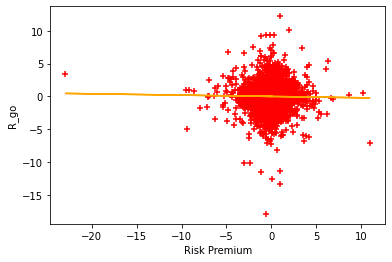

In [100]:
plt.xlabel('Risk Premium')
plt.ylabel('R_go')
plt.scatter(data.R_p,data.R_gold,color='red',marker='+')
plt.plot(data.R_p,reg.predict(data[['R_p']]), color='orange')


In [101]:
#model with intercept
X= sm.add_constant(X)
model = sm.OLS(y1,X).fit()
predictions = model.predict(X)
j= (model.summary())
print(j)

                            OLS Regression Results                            
Dep. Variable:                   R_go   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.181
Date:                Thu, 24 Jun 2021   Prob (F-statistic):             0.0745
Time:                        13:42:13   Log-Likelihood:                -16959.
No. Observations:               10436   AIC:                         3.392e+04
Df Residuals:                   10434   BIC:                         3.394e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0057      0.012      0.473      0.6

DW-stats of 2.071 is close to 2.0, implying that there is no serial correlation.

Yet, the p-value of the beta coefficient indicates that it is slightly significant at 7.5% significance level and the R-squared is very low, explaining low explanatory power of the model.

# Residuals plot for gold

C:\Users\rluck\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

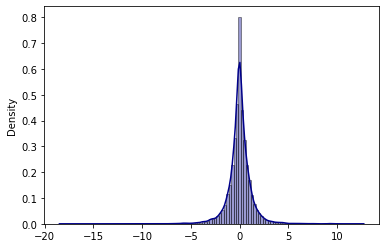

In [102]:
residuals_go = model.resid
import seaborn as sns
sns.distplot(residuals_go,hist=True, kde=True, bins=int(120), color= 'darkblue',hist_kws={'edgecolor':'black'})

In [103]:
from scipy import stats
JB_go= stats.jarque_bera(residuals_go)
JB_go

Jarque_beraResult(statistic=111926.42195044507, pvalue=0.0)

The plot and JB test (p-value <0.05) rejects the null hypothesis of normality. It is clearly a non-normal distribution.

# Cusum Test for Gold

C:\Users\rluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


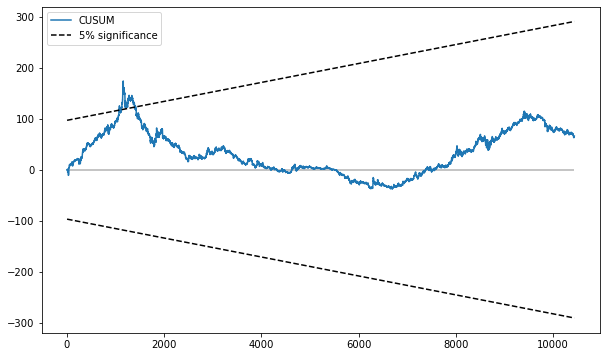

In [104]:
# endog = data.R_go
Rp = data.R_p
endog = data.R_go
exog = sm.add_constant(Rp)
mod = sm.RecursiveLS(endog,exog)
res_1 = mod.fit()
fig = res_1.plot_cusum(figsize=(10,6));

Cusum test of stability for gold shows high periods of instability during the early part of the graph (namely before 1980s).Then, the beta stabilises.

# White Test of Heteroskedasticity for Gold

In [105]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
from patsy import dmatrices

In [106]:
expr = 'y1 ~ X'
y1, X = dmatrices(expr, data, return_type='dataframe')
olsr_results = smf.ols(expr, data).fit()
keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value:', 'F-statistic:', 'F-test\'s p-value:']
results = het_white(olsr_results.resid, X)
lzip(keys, results)

[('Lagrange Multiplier statistic:', 36.866651106570274),
 ("LM test's p-value:", 9.874348003656595e-09),
 ('F-statistic:', 18.49335699862814),
 ("F-test's p-value:", 9.608158442586967e-09)]

LM test statistic is 36.87 and the corresponding p-value is 0

F-stats = 18.49 and the corresponding p-value is 0

Since the p-value of the both LM and F-stats is less than 0.05, we reject the null hypothesis that there is no heteroskedasticity in the residuals. It infers that the heteroskedasticity exists and the standard errors need to be corrected.

# Breusch-Godfrey LM test for Gold

In [107]:
import statsmodels.stats.diagnostic as dg
print (dg.acorr_breusch_godfrey(model, nlags= 2))

(14.058774886495657, 0.0008854740175917412, 7.036171882380294, 0.0008836668869260258)


T-statistic of Chi-squared is 14.0588 and the corresponding p-value is 0.0009 

F-statistic is 7.0362 and the corresponding p-value is 0.0009

Since p-value is less than 0.05, we reject the null hypothesis, thus inferring there is some autocorrelation at order less than or equal to 2.0

# II. Plotting GE excess returns with market excess returns

In [108]:
%matplotlib inline
reg = linear_model.LinearRegression()
X =data[['R_p']]
y =data['R_ge']
reg.fit(X,y)

LinearRegression()

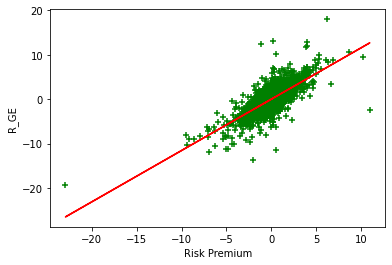

In [109]:
plt.xlabel('Risk Premium')
plt.ylabel('R_GE')
plt.scatter(data.R_p,data.R_GE,color='green',marker='+')
plt.plot(data.R_p,reg.predict(data[['R_p']]), color='red')


# Regressing GE excess return with market excess return

In [110]:
#model with intercept
X =sm.add_constant(X)
model_1 = sm.OLS(y,X).fit()
predictions = model_1.predict(X)
j= (model_1.summary())
print(j)

                            OLS Regression Results                            
Dep. Variable:                   R_ge   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                 1.351e+04
Date:                Thu, 24 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:42:14   Log-Likelihood:                -15682.
No. Observations:               10436   AIC:                         3.137e+04
Df Residuals:                   10434   BIC:                         3.138e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0012      0.011     -0.114      0.9

DW-stats of 1.995 is close to 2.0, implying that there is no serial correlation.

Since p-value of the beta coefficient is less than 0.05, we reject the null hypothesis that beta is zero.

The CAPM equation for GE can be written as follows:

$R_ge = 1.1569*R_p + Rf$ 

where $R_ge$ is the return from GE stock, $R_p = Rm-Rf$ is the market risk premium and Rf is the risk free rate of return 

If we want to replicate the returns from GE, we can rearrange the above equation:

$R_ge = 1.1569*Rm + (1-1.1569)*Rf$

$\Rightarrow$ We can buy 1.1569 of market portfolio (i.e: S&P500 index fund) and then short 0.1569 T-Bill.

# Residual Plots for GE

C:\Users\rluck\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

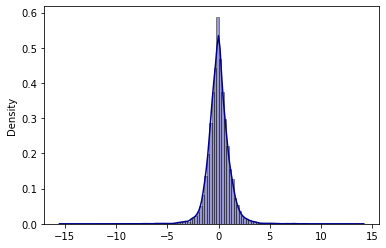

In [111]:
residuals = model_1.resid
import seaborn as sns
sns.distplot(residuals,hist=True, kde=True, bins=int(120), color= 'darkblue',hist_kws={'edgecolor':'black'})

In [112]:
from scipy import stats
JB_GE= stats.jarque_bera(residuals)
JB_GE

Jarque_beraResult(statistic=109234.31887176927, pvalue=0.0)

The plot and JB test (p-value <0.05) rejects the null hypothesis of normality. It is clearly a non-normal distribution.

C:\Users\rluck\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


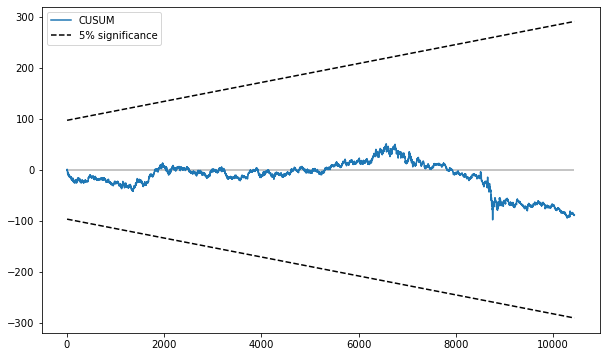

In [113]:
endog = data.R_ge
Rp = data.R_p
exog = sm.add_constant(Rp)
mod = sm.RecursiveLS(endog,exog)
res_1 = mod.fit()
fig = res_1.plot_cusum(figsize=(10,6));

Cusum test of stability for GE shows stability of beta as it is within the 5% significance level band.

# White Test of Heteroskedasticity for GE

In [114]:
expr = 'y ~ X'
y, X = dmatrices(expr, data, return_type='dataframe')
olsr_results = smf.ols(expr, data).fit()
keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value:', 'F-statistic:', 'F-test\'s p-value:']
results = het_white(olsr_results.resid, X)
lzip(keys, results)

[('Lagrange Multiplier statistic:', 600.7119211665138),
 ("LM test's p-value:", 3.606315445696676e-131),
 ('F-statistic:', 318.60924780728743),
 ("F-test's p-value:", 4.9073934718673876e-135)]

LM test statistic is 600.72 and the corresponding p-value is 0

F-stats = 318.61 and the corresponding p-value is 0

Since the p-value of the both LM and F-stats is less than 0.05, we reject the null hypothesis that there is no heteroskedasticity in the residuals. It infers that the heteroskedasticity exists and the standard errors need to be corrected.

In [115]:
print (dg.acorr_breusch_godfrey(model_1, nlags= 2))

(5.174836714176367, 0.07521396525512013, 2.587709781212114, 0.07524031416320724)


T-statistic of Chi-squared = 5.1748 and the corresponding p-value = 0.075. 

F-statistics = 2.5877 and the corresponding p-value = 0.075

Since p-value exceeds 0.05, we fail to reject the null hypothesis, thus inferring there is no autocorrelation at order less than or equal to 2.0

# Extra: Correlation matrix between returns of gold, GE and market

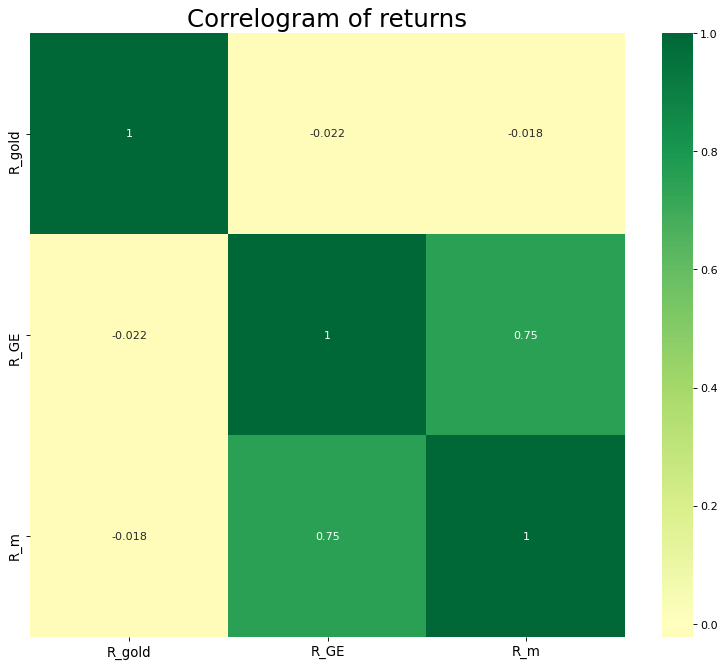

In [116]:
import seaborn as sns
import pandas as pd
# Import Dataset
data = pd.read_csv("C:\\Users\\rluck\\OneDrive\\capm1.csv", usecols=['R_gold','R_m', 'R_GE'])

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of returns', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()